In [15]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline


In [7]:
# respondents = pd.read_csv('data/atusresp_2014.dat')
# roster = pd.read_csv('data/atusrost_2014.dat')
# activity = pd.read_csv('data/atusact_2014.dat')

summary = pd.read_csv('data/atussum_2014.dat')
from summary_data import *
summary = summary.rename(columns=all_cols)

In [8]:
summary.head()

,case_id,stat_weight,age_youngest_child,age,sex,high_lvl_edu,race,hisp,metro,labor_status,...,Travel related to phone calls,"Travel rel. to phone calls, n.e.c.*",Security procedures related to traveling,"Security procedures related to traveling, n.e.c.*","Traveling, n.e.c.*",Insufficient detail in verbatim,Missing travel or destination,Respondent refused to provide information/'none of your business',Gap/can't remember,Unable to code activity at 1st tier
0,20140101140007,4891315.826760,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,23147368.359655,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,20941823.429044,2,65,2,38,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,2505899.417166,-1,50,2,39,2,2,2,5,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,15928231.823165,8,23,2,39,2,2,2,4,...,0,0,0,0,0,0,0,0,0,0


## Level of Schooling by Gender

In [9]:
schooling = summary[['high_lvl_edu', 'sex']]
schooling.head()

highest_edu_lvl = schooling['high_lvl_edu']
highest_edu_lvl.count()

11592

In [10]:
female = schooling[schooling.sex==1].groupby('high_lvl_edu').count().reset_index()
male = schooling[schooling.sex==2].groupby('high_lvl_edu').count().reset_index()

school_by_sex = pd.merge(male, female, on='high_lvl_edu')
school_by_sex.pivot_table(index='high_lvl_edu')

,sex_x,sex_y
high_lvl_edu,,
31,8,11
32,42,27
33,74,66
34,121,115
35,131,138
36,161,153
37,173,178
38,65,59
39,1630,1263


The left-hand column on the chart above shows the numeric version of levels of educational achievement of study respondents.  The second and third columns have the total the number of male (sex_x) and female (sex_y) respondents who attained that educational level as their highest.  
Highlights:  
- levels 31-34 represent leaving school before high school, 
- level 39 means a high school diploma was obtained, 
- 41 and 42 are associates degrees, 
- level 43 is a bachelors degree, 
- 44 is a master's degree, and 
- 45 and 46 are doctor-level degrees.

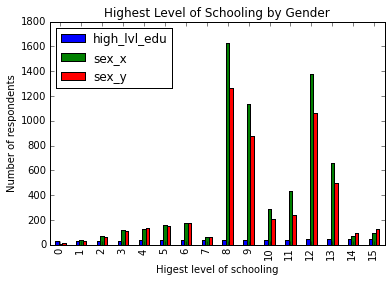

In [16]:
school_by_sex.high_lvl_edu.value_counts()

school_by_sex.plot(title='Highest Level of Schooling by Gender', legend=True, kind='bar')
plt.xlabel('Higest level of schooling')
plt.ylabel('Number of respondents')
plt.show()

##  Level of Educational Attainment by Gender
The green bar in each pair above represents male respondents, and red the female respondents.  At all of the most common levels of educational attainment (8 = high school, 9 = some college, but no degree, 12 = bachelors degree, 13 = masters degree, 14 and 15 represent doctoral degrees), male respondents outnumbered female respondents.  In the pool of total respondents, there were 5124 males and 6468 females, so it seems significant that there were more males than females attaining higher educational goals.

## Number of Persons Working Full-time and also Using Interior Cleaning Services
We can see below that there are 3009 female and 2542 male respondents who are working full-time at the time of the survey.  How many respondents use interior cleaning services?

In [11]:
ft_work = summary[summary['ft_pt'] == 1]
ft_work.sex.value_counts()


1    3009
2    2542
dtype: int64

In [14]:
cleaning_crew = summary[summary['Using interior cleaning services']]
cleaning_crew.head(10)


,case_id,case_id,case_id,case_id,case_id,case_id,case_id,case_id,case_id,case_id,...,case_id,case_id,case_id,case_id,case_id,case_id,case_id,case_id,case_id,case_id
0,20140101140007,20140101140007,20140101140007,20140101140007,20140101140007,20140101140007,20140101140007,20140101140007,20140101140007,20140101140007,...,20140101140007,20140101140007,20140101140007,20140101140007,20140101140007,20140101140007,20140101140007,20140101140007,20140101140007,20140101140007
1,20140101140011,20140101140011,20140101140011,20140101140011,20140101140011,20140101140011,20140101140011,20140101140011,20140101140011,20140101140011,...,20140101140011,20140101140011,20140101140011,20140101140011,20140101140011,20140101140011,20140101140011,20140101140011,20140101140011,20140101140011
2,20140101140028,20140101140028,20140101140028,20140101140028,20140101140028,20140101140028,20140101140028,20140101140028,20140101140028,20140101140028,...,20140101140028,20140101140028,20140101140028,20140101140028,20140101140028,20140101140028,20140101140028,20140101140028,20140101140028,20140101140028
3,20140101140063,20140101140063,20140101140063,20140101140063,20140101140063,20140101140063,20140101140063,20140101140063,20140101140063,20140101140063,...,20140101140063,20140101140063,20140101140063,20140101140063,20140101140063,20140101140063,20140101140063,20140101140063,20140101140063,20140101140063
4,20140101140168,20140101140168,20140101140168,20140101140168,20140101140168,20140101140168,20140101140168,20140101140168,20140101140168,20140101140168,...,20140101140168,20140101140168,20140101140168,20140101140168,20140101140168,20140101140168,20140101140168,20140101140168,20140101140168,20140101140168
5,20140101140537,20140101140537,20140101140537,20140101140537,20140101140537,20140101140537,20140101140537,20140101140537,20140101140537,20140101140537,...,20140101140537,20140101140537,20140101140537,20140101140537,20140101140537,20140101140537,20140101140537,20140101140537,20140101140537,20140101140537
6,20140101140559,20140101140559,20140101140559,20140101140559,20140101140559,20140101140559,20140101140559,20140101140559,20140101140559,20140101140559,...,20140101140559,20140101140559,20140101140559,20140101140559,20140101140559,20140101140559,20140101140559,20140101140559,20140101140559,20140101140559
7,20140101140610,20140101140610,20140101140610,20140101140610,20140101140610,20140101140610,20140101140610,20140101140610,20140101140610,20140101140610,...,20140101140610,20140101140610,20140101140610,20140101140610,20140101140610,20140101140610,20140101140610,20140101140610,20140101140610,20140101140610
8,20140101140614,20140101140614,20140101140614,20140101140614,20140101140614,20140101140614,20140101140614,20140101140614,20140101140614,20140101140614,...,20140101140614,20140101140614,20140101140614,20140101140614,20140101140614,20140101140614,20140101140614,20140101140614,20140101140614,20140101140614
9,20140101140639,20140101140639,20140101140639,20140101140639,20140101140639,20140101140639,20140101140639,20140101140639,20140101140639,20140101140639,...,20140101140639,20140101140639,20140101140639,20140101140639,20140101140639,20140101140639,20140101140639,20140101140639,20140101140639,20140101140639
